<a href="https://colab.research.google.com/github/morganizzzm/deep-learning-projects/blob/main/Face_Mask_Detection_with_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()



***Importing the Dependencies***

In [5]:
import os
import cv2
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image


In [6]:
#create a list of file names from data/with_mask and from data/without_mask
with_mask_files_names = os.listdir('/content/data/with_mask')
num_with_mask_entries = len(with_mask_files_names)
without_mask_files_names = os.listdir('/content/data/without_mask')
num_without_mask_entries = len(without_mask_files_names)



***Creating labels***


with mask = 1


without mask = 0


In [7]:
# create the labels
# we have # num_with_mask_entries elements which have label 1 and # num_without_mask_entries which have label 0
labels = [1]*num_with_mask_entries + [0]*num_without_mask_entries

***Image Processing***

There are 2 things that we have to do to use them as input for the neural network:

1. resize the images;

2. convert them to the numpy arrays

In [8]:
def process_images(image_paths_array, folder_path, target_size):
    data = []

    for image_path in image_paths_array:
        img = cv2.imread(folder_path+image_path)

        if img is not None:
            img = cv2.resize(img, target_size)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB format
            img_array = np.array(img)
            data.append(img_array)
        else:
            print(f"Failed to load image from {path}")

    return data

with_mask_path = "/content/data/with_mask/"
without_mask_path = "/content/data/without_mask/"
target_size = (128, 128)

data = process_images(with_mask_files_names, with_mask_path, target_size) + process_images(without_mask_files_names, without_mask_path, target_size)

X = np.array(data)
Y = np.array(labels)

***Train Test Split***

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)

In [10]:
X_test_float = X_test/255
X_train_float = X_train/255

***Building CNN***

In [11]:
import tensorflow as tf
from tensorflow import keras

In [12]:
model = keras.Sequential()
num_of_classes = 2
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu',
                              input_shape = (128, 128, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))


In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [14]:
#training the network
fiitted_model = model.fit(X_train_float, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 20s 25ms/step - loss: 0.5961 - acc: 0.7072 - val_loss: 0.2601 - val_acc: 0.8926
Epoch 2/5
170/170 [==============================] - 4s 25ms/step - loss: 0.3100 - acc: 0.8751 - val_loss: 0.2555 - val_acc: 0.9025
Epoch 3/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2440 - acc: 0.9007 - val_loss: 0.2100 - val_acc: 0.9223
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2194 - acc: 0.9136 - val_loss: 0.2716 - val_acc: 0.8992
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1718 - acc: 0.9351 - val_loss: 0.2200 - val_acc: 0.9372


## **Model Evaluation **

In [15]:
loss, accuracy = model.evaluate(X_test_float, Y_test)
print("Test accuracy", accuracy)

48/48 [==============================] - 0s 10ms/step - loss: 0.2264 - acc: 0.9166
Test accuracy 0.9166114926338196


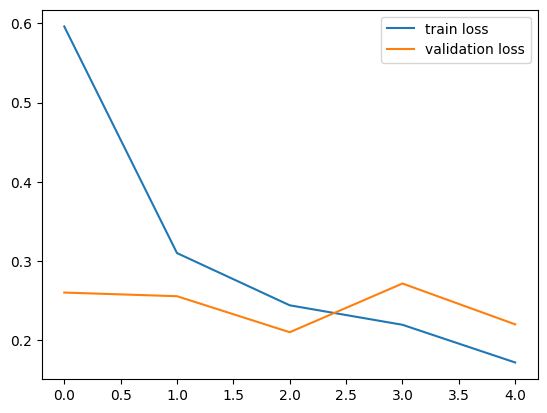

In [19]:
plt.plot(fiitted_model.history['loss'], label='train loss')
plt.plot(fiitted_model.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

***Predictive System***


In [25]:
def prepare_image_for_prediction(input_image, target_size=(128, 128)):
  img = cv2.resize(input_image, target_size)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB format
  img_array = np.array(img)
  img_array = img_array/255
  input_image_reshaped = np.reshape(img_array, [1,128,128,3])
  return input_image_reshaped



Path of the image to be predicted: /content/human_mask.jpg


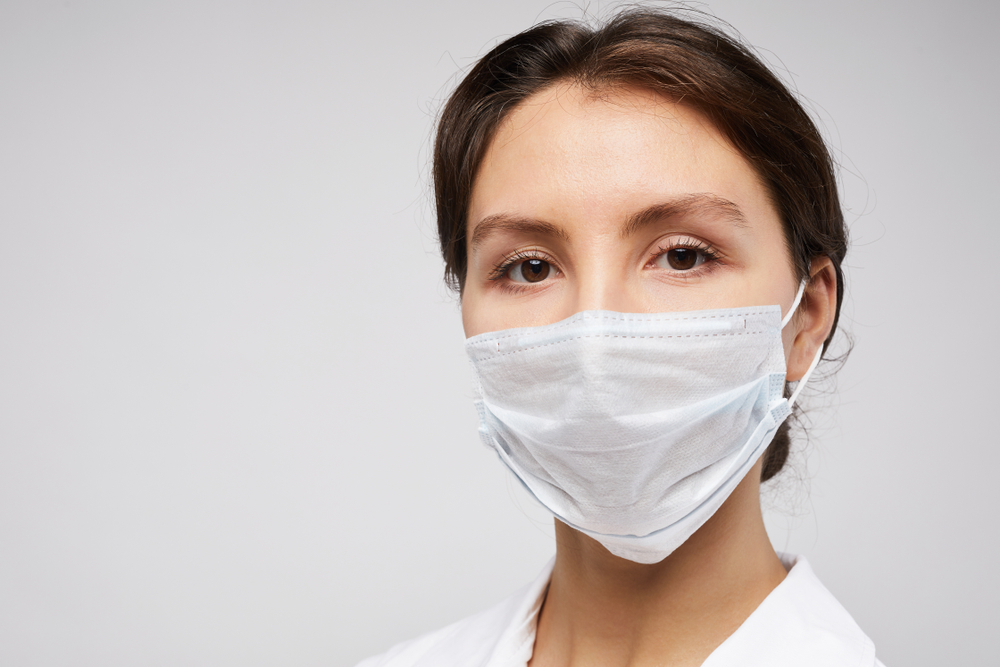

1/1 [==============================] - 0s 27ms/step
The person in the image is wearing a mask


In [28]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

input_prediction = model.predict(prepare_image_for_prediction(input_image))

input_pred_label = np.argmax(input_prediction)
if input_pred_label == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/human.jpeg


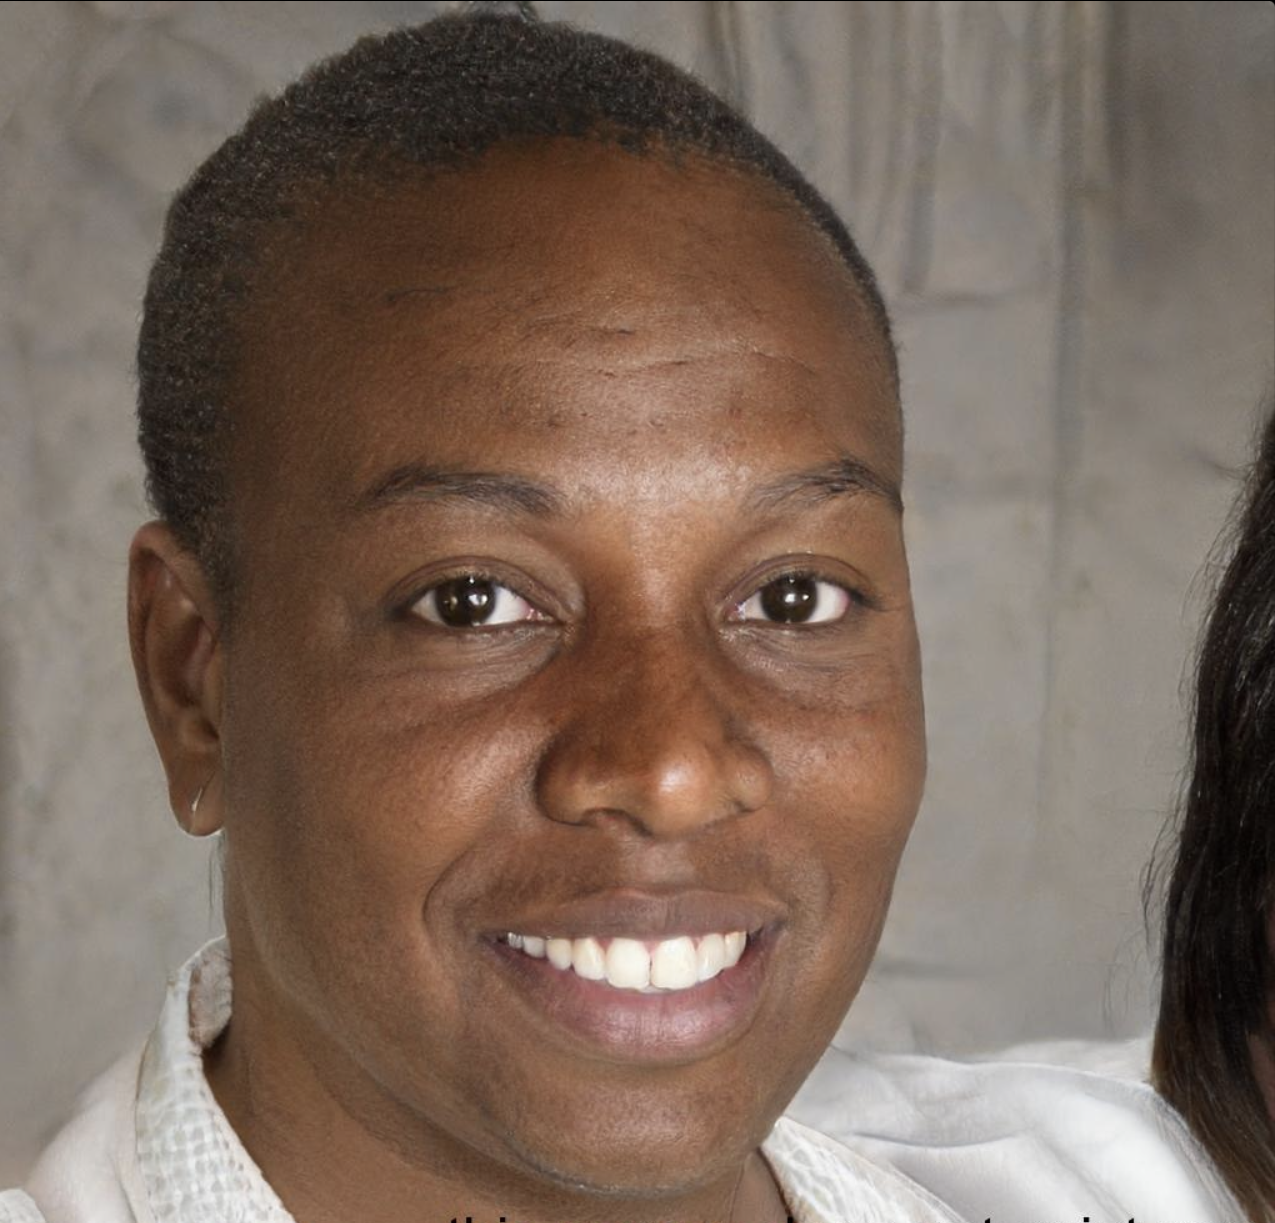

1/1 [==============================] - 0s 28ms/step
The person in the image is not wearing a mask


In [30]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

input_prediction = model.predict(prepare_image_for_prediction(input_image))


input_pred_label = np.argmax(input_prediction)
if input_pred_label == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')